In [14]:
import glob

import nibabel as nib
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from util.constants import TRAIN_PATH, VALIDATION_PATH

scaler = MinMaxScaler()


def to_categorical(y, n_classes):
    return np.eye(n_classes, dtype="uint8")[y]


def nib_load(path):
    return nib.load(path).get_data()

In [15]:
# test_image_flair=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
# print(test_image_flair.shape)
# print(test_image_flair.min())
# print(test_image_flair.max())
# #Scalers are applied to 1D so let us reshape and then reshape back to original shape.
# test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
#
#
# test_image_t1=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
# test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
# print(test_image_t1.shape)
# print(test_image_t1.min())
# print(test_image_t1.max())
# test_image_t1ce=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
# test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
# print(test_image_t1ce.shape)
# print(test_image_t1ce.min())
# print(test_image_t1ce.max())
#
# test_image_t2=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
# test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
# print(test_image_t2.shape)
# print(test_image_t2.min())
# print(test_image_t2.max())
#
# test_mask=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
# test_mask=test_mask.astype(np.uint8)
# print(test_mask.shape)
# print(test_mask.min())
# print(test_mask.max())

(240, 240, 155)
0.0
1854.603271484375
(240, 240, 155)
0.0
1.0
(240, 240, 155)
0.0
1.0
(240, 240, 155)
0.0
1.0
(240, 240, 155)
0
4


In [16]:
# print(np.unique(test_mask))
# test_mask[test_mask==4] = 3
# print(np.unique(test_mask))

[0 1 2 4]
[0 1 2 3]


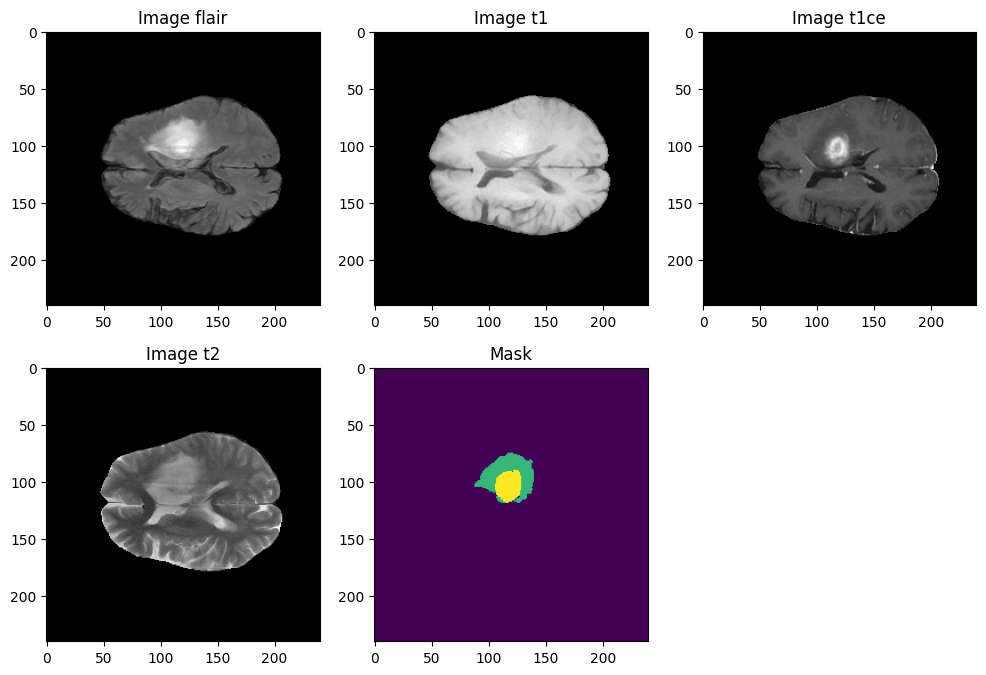

82


In [27]:
# import random
# n_slice=random.randint(0, test_mask.shape[2])
#
# plt.figure(figsize=(12, 8))
#
# plt.subplot(231)
# plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
# plt.title('Image flair')
# plt.subplot(232)
# plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
# plt.title('Image t1')
# plt.subplot(233)
# plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
# plt.title('Image t1ce')
# plt.subplot(234)
# plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
# plt.title('Image t2')
# plt.subplot(235)
# plt.imshow(test_mask[:,:,n_slice])
# plt.title('Mask')
# plt.show()
# print(n_slice)

### Pre-processing and Cleaning

In [41]:
t2_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*t2.nii'))  # 369 training instances
t1ce_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*t1ce.nii'))
flair_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*flair.nii'))
mask_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*seg.nii'))

In [47]:
v_t2_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*t2.nii'))  # 125 validation data instances
v_t1ce_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*t1ce.nii'))
v_flair_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*flair.nii'))
v_mask_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*seg.nii'))

In [56]:
# t2_all = t2_list + v_t2_list
# t1ce_all = t1ce_list + v_t1ce_list
# flair_all = flair_list + v_flair_list
# mask_all = mask_list + v_mask_list

In [58]:
for img in range(len(t2_list)):
    print("image index at:", img)

    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(
        temp_image_t2.shape)

    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(
        temp_image_t1ce.shape)

    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(
        temp_image_flair.shape)

    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask[temp_mask == 4] = 3

    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0] / counts.sum())) >= 0.01:  #At least 1% useful volume with labels that are not 0
        print("Saving image", img)
        # temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save(f'{TRAIN_PATH}/3c/images/image_' + str(img) + '.npy', temp_combined_images)
        np.save(f'{TRAIN_PATH}/3c/masks/mask_' + str(img) + '.npy', temp_mask)

    else:
        print("Discarded image", img)


image index at: 0
Saving image 0
image index at: 1
Saving image 1
image index at: 2
Saving image 2
image index at: 3
Saving image 3
image index at: 4
Discarded image 4
image index at: 5
Saving image 5
image index at: 6
Saving image 6
image index at: 7
Saving image 7
image index at: 8
Saving image 8
image index at: 9
Saving image 9
image index at: 10
Saving image 10
image index at: 11
Saving image 11
image index at: 12
Saving image 12
image index at: 13
Saving image 13
image index at: 14
Saving image 14
image index at: 15
Saving image 15
image index at: 16
Saving image 16
image index at: 17
Saving image 17
image index at: 18
Saving image 18
image index at: 19
Saving image 19
image index at: 20
Saving image 20
image index at: 21
Saving image 21
image index at: 22
Saving image 22
image index at: 23
Saving image 23
image index at: 24
Saving image 24
image index at: 25
Saving image 25
image index at: 26
Saving image 26
image index at: 27
Discarded image 27
image index at: 28
Saving image 28

In [ ]:
for img in range(len(t2_list)):
    print("image index at:", img)

    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(
        temp_image_t2.shape)

    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(
        temp_image_t1ce.shape)

    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(
        temp_image_flair.shape)

    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask[temp_mask == 4] = 3

    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    # temp_mask= to_categorical(temp_mask, num_classes=4)
    np.save(f'{TRAIN_PATH}/3c_all/images/image_' + str(img) + '.npy', temp_combined_images)
    np.save(f'{TRAIN_PATH}/3c_all/masks/mask_' + str(img) + '.npy', temp_mask)#%%
import glob

import nibabel as nib
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from util.constants import TRAIN_PATH, VALIDATION_PATH

scaler = MinMaxScaler()


def to_categorical(y, n_classes):
    return np.eye(n_classes, dtype="uint8")[y]


def nib_load(path):
    return nib.load(path).get_data()

In [ ]:
# test_image_flair=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
# print(test_image_flair.shape)
# print(test_image_flair.min())
# print(test_image_flair.max())
# #Scalers are applied to 1D so let us reshape and then reshape back to original shape.
# test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
#
#
# test_image_t1=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
# test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
# print(test_image_t1.shape)
# print(test_image_t1.min())
# print(test_image_t1.max())
# test_image_t1ce=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
# test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
# print(test_image_t1ce.shape)
# print(test_image_t1ce.min())
# print(test_image_t1ce.max())
#
# test_image_t2=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
# test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
# print(test_image_t2.shape)
# print(test_image_t2.min())
# print(test_image_t2.max())
#
# test_mask=nib.load(TRAIN_PATH + '/BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
# test_mask=test_mask.astype(np.uint8)
# print(test_mask.shape)
# print(test_mask.min())
# print(test_mask.max())

In [ ]:
# print(np.unique(test_mask))
# test_mask[test_mask==4] = 3
# print(np.unique(test_mask))

In [ ]:
# import random
# n_slice=random.randint(0, test_mask.shape[2])
#
# plt.figure(figsize=(12, 8))
#
# plt.subplot(231)
# plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
# plt.title('Image flair')
# plt.subplot(232)
# plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
# plt.title('Image t1')
# plt.subplot(233)
# plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
# plt.title('Image t1ce')
# plt.subplot(234)
# plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
# plt.title('Image t2')
# plt.subplot(235)
# plt.imshow(test_mask[:,:,n_slice])
# plt.title('Mask')
# plt.show()
# print(n_slice)

### Pre-processing and Cleaning

In [ ]:
t2_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*t2.nii'))  # 369 training instances
t1ce_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*t1ce.nii'))
flair_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*flair.nii'))
mask_list = sorted(glob.glob(f'{TRAIN_PATH}/*/*seg.nii'))

In [63]:
v_t2_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*t2.nii'))  # 125 validation data instances
v_t1ce_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*t1ce.nii'))
v_flair_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*flair.nii'))
v_mask_list = sorted(glob.glob(f'{VALIDATION_PATH}/*/*seg.nii'))

In [ ]:
# t2_all = t2_list + v_t2_list
# t1ce_all = t1ce_list + v_t1ce_list
# flair_all = flair_list + v_flair_list
# mask_all = mask_list + v_mask_list

In [ ]:
for img in range(len(t2_list)):
    print("image index at:", img)

    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(
        temp_image_t2.shape)

    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(
        temp_image_t1ce.shape)

    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(
        temp_image_flair.shape)

    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask[temp_mask == 4] = 3

    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0] / counts.sum())) >= 0.01:  #At least 1% useful volume with labels that are not 0
        print("Saving image", img)
        # temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save(f'{TRAIN_PATH}/3c/images/image_' + str(img) + '.npy', temp_combined_images)
        np.save(f'{TRAIN_PATH}/3c/masks/mask_' + str(img) + '.npy', temp_mask)

    else:
        print("Discarded image", img)


In [60]:
for img in range(len(t2_list)):
    print("image index at:", img)

    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(
        temp_image_t2.shape)

    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(
        temp_image_t1ce.shape)

    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(
        temp_image_flair.shape)

    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask[temp_mask == 4] = 3

    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    # temp_mask= to_categorical(temp_mask, num_classes=4)
    np.save(f'{TRAIN_PATH}/3c_all/images/image_' + str(img) + '.npy', temp_combined_images)
    np.save(f'{TRAIN_PATH}/3c_all/masks/mask_' + str(img) + '.npy', temp_mask)


image index at: 0
image index at: 1
image index at: 2
image index at: 3
image index at: 4
image index at: 5
image index at: 6
image index at: 7
image index at: 8
image index at: 9
image index at: 10
image index at: 11
image index at: 12
image index at: 13
image index at: 14
image index at: 15
image index at: 16
image index at: 17
image index at: 18
image index at: 19
image index at: 20
image index at: 21
image index at: 22
image index at: 23
image index at: 24
image index at: 25
image index at: 26
image index at: 27
image index at: 28
image index at: 29
image index at: 30
image index at: 31
image index at: 32
image index at: 33
image index at: 34
image index at: 35
image index at: 36
image index at: 37
image index at: 38
image index at: 39
image index at: 40
image index at: 41
image index at: 42
image index at: 43
image index at: 44
image index at: 45
image index at: 46
image index at: 47
image index at: 48
image index at: 49
image index at: 50
image index at: 51
image index at: 52
ima

In [64]:
v_mask_list.__len__() #Validation set does not have masks, so we discard them

0

In [61]:
# for img in range(len(v_t2_list)):
#     print("image index at:", img)
#
#     temp_image_t2 = nib.load(v_t2_list[img]).get_fdata()
#     temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(
#         temp_image_t2.shape)
#
#     temp_image_t1ce = nib.load(v_t1ce_list[img]).get_fdata()
#     temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(
#         temp_image_t1ce.shape)
#
#     temp_image_flair = nib.load(v_flair_list[img]).get_fdata()
#     temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(
#         temp_image_flair.shape)
#
#     temp_mask = nib.load(v_mask_list[img]).get_fdata()
#     temp_mask = temp_mask.astype(np.uint8)
#     temp_mask[temp_mask == 4] = 3
#
#     temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
#
#     temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
#     temp_mask = temp_mask[56:184, 56:184, 13:141]
#
#     val, counts = np.unique(temp_mask, return_counts=True)
#
#     if (1 - (counts[0]/counts.sum())) >= 0.01:  #At least 1% useful volume with labels that are not 0
#         print("Saving image", img)
#         # temp_mask= to_categorical(temp_mask, num_classes=4)
#         np.save(f'{VALIDATION_PATH}/3c/images/image_'+str(img)+'.npy', temp_combined_images)
#         np.save(f'{VALIDATION_PATH}/3c/masks/mask_'+str(img)+'.npy', temp_mask)
#
#     else:
#         print("Discarded image", img)

image index at: 0


IndexError: list index out of range

In [ ]:
# for img in range(len(v_t2_list)):
#     print("image index at:", img)
#
#     temp_image_t2 = nib.load(v_t2_list[img]).get_fdata()
#     temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(
#         temp_image_t2.shape)
#
#     temp_image_t1ce = nib.load(v_t1ce_list[img]).get_fdata()
#     temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(
#         temp_image_t1ce.shape)
#
#     temp_image_flair = nib.load(v_flair_list[img]).get_fdata()
#     temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(
#         temp_image_flair.shape)
#
#     temp_mask = nib.load(v_mask_list[img]).get_fdata()
#     temp_mask = temp_mask.astype(np.uint8)
#     temp_mask[temp_mask == 4] = 3
#
#     temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
#
#     temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
#     temp_mask = temp_mask[56:184, 56:184, 13:141]
#
#     val, counts = np.unique(temp_mask, return_counts=True)
#
#     # temp_mask= to_categorical(temp_mask, num_classes=4)
#     np.save(f'{VALIDATION_PATH}/3c_all/images/image_'+str(img)+'.npy', temp_combined_images)
#     np.save(f'{VALIDATION_PATH}/3c_all/masks/mask_'+str(img)+'.npy', temp_mask)


In [65]:
import splitfolders # the original data's validation cannot be used as test, due to a lack of masks

clean_data_folder = 'D:/datasets/brats2020/3c_all'
target_folder = 'D:/datasets/brats2020/3c_all_split'
splitfolders.ratio(clean_data_folder, output=target_folder, seed=42, ratio=(.6, .4), group_prefix=None) # default values

Copying files: 738 files [00:48, 15.21 files/s]


In [76]:
# np.max(temp_mask)

3